In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import string

In [2]:
PATH = "/home/dgarciamur/root/TFM/Transformer_TFM/project/resources/datasets/tinyshakespeare.txt"

In [8]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/dgarciamur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/dgarciamur/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dgarciamur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
with open(PATH, "r") as f:
    texto = f.read()

In [6]:
texto = texto.lower()

In [9]:
# Limpieza 
word_tokens = word_tokenize(texto)
sentences = nltk.sent_tokenize(texto)

word_tokens = [word for word in word_tokens if word.isalpha()]

In [16]:
# 1. Estadísticas iniciales: nº caracteres, palabras, oraciones, líneas, longitud promedio de las palabras y las oraciones (histograma)

word_counts = Counter(word_tokens)
num_words = sum(word_counts.values())
avg_word_len = sum(len(w) for w in word_tokens) / len(word_tokens)

avg_sentence_len = sum(len(nltk.word_tokenize(s)) for s in sentences) / len(sentences)


print(f"Número de caracteres: {len(texto)}")
print(f"Número de líneas: {texto.count('\n')}")

print(f"Número de palabras: {num_words}")
print(f"Número de oraciones: {len(sentences)}")


print(f"Longitud promedio palabras: {avg_word_len}")
print(f"Longitud promedio oraciones: {avg_sentence_len}")

Número de caracteres: 1115394
Número de líneas: 40000
Número de palabras: 200837
Número de oraciones: 12449
Longitud promedio palabras: 4.1376837933249355
Longitud promedio oraciones: 20.46493694272632


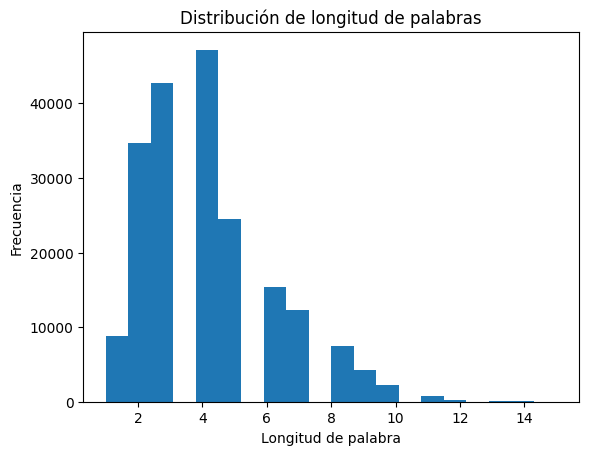

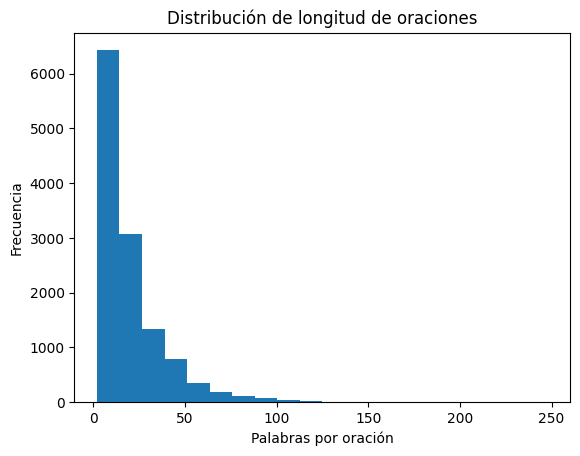

In [11]:
word_lengths = [len(w) for w in word_tokens]
plt.hist(word_lengths, bins=20)
plt.title("Distribución de longitud de palabras")
plt.xlabel("Longitud de palabra")
plt.ylabel("Frecuencia")
plt.show()

sentence_lengths = [len(nltk.word_tokenize(s)) for s in sentences]
plt.hist(sentence_lengths, bins=20)
plt.title("Distribución de longitud de oraciones")
plt.xlabel("Palabras por oración")
plt.ylabel("Frecuencia")
plt.show()

In [12]:
# 2. Distribución de frecuencia: proporción de stopwords, palabras raras, caracteres no alfanuméricos ni de puntuación
stop_words_corpus = [word for word in word_tokens if word in stop_words]
rare_words = [w for w, freq in word_counts.items() if freq < 5] # Aparece menos de 5 veces

stop_ratio = len(stop_words_corpus) / num_words
rare_ratio = len(rare_words) / len(word_counts)

print(f"Porcentaje de stop words en el vocabulario: {stop_ratio*100:.2f}%")

print(f"Porcentaje de palabras raras en el vocabulario: {rare_ratio*100:.2f}%")


Porcentaje de stop words en el vocabulario: 48.42%
Porcentaje de palabras raras en el vocabulario: 71.86%


In [13]:
valid_chars = set(string.ascii_letters + string.digits + string.punctuation + ' \n\t')

invalid_chars = [ch for ch in texto if ch not in valid_chars]

invalid_unique = set(invalid_chars)

total_chars = len(texto)
num_invalid = len(invalid_chars)
percent_invalid = (num_invalid / total_chars) * 100

print("Caracteres no alfanuméricos ni de puntuación estándar encontrados:")
print(invalid_unique)
print(f"Porcentaje de caracteres no válidos: {percent_invalid:.4f}%")

Caracteres no alfanuméricos ni de puntuación estándar encontrados:
set()
Porcentaje de caracteres no válidos: 0.0000%


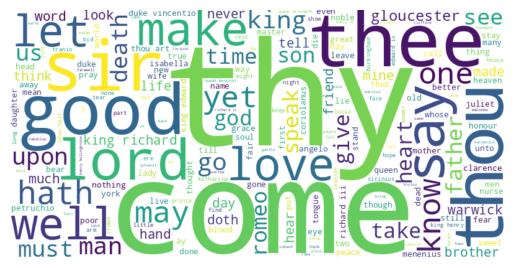

In [14]:
# 3. Wordcloud para extraer las palabras más y menos frecuentes del texto y pintarlas
texto_clean = [word for word in word_tokens if word not in stop_words]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texto_clean))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


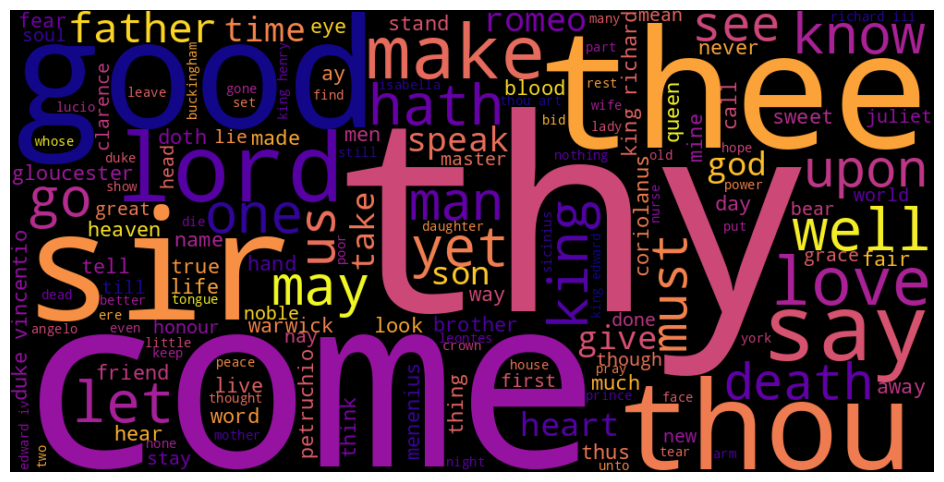

In [19]:
# Generación de la nube de palabras del corpus preprocesado
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=150,
    colormap='viridis'
).generate(' '.join(texto_clean))

# Visualización de la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


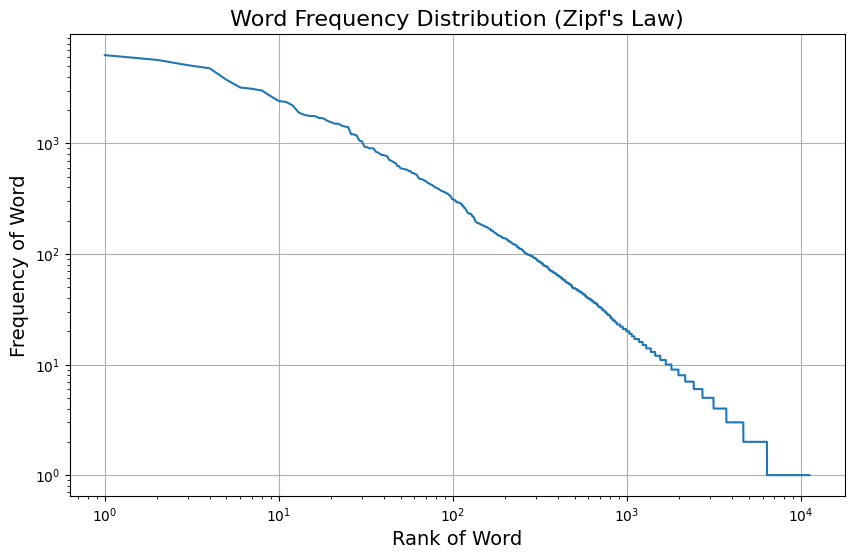

In [15]:
# 4. Zipf

word_frequencies = list(word_counts.values())
word_frequencies.sort(reverse=True)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(word_frequencies) + 1), word_frequencies)
plt.yscale('log')
plt.xscale('log')
plt.title("Word Frequency Distribution (Zipf's Law)", fontsize=16)
plt.xlabel('Rank of Word', fontsize=14)
plt.ylabel('Frequency of Word', fontsize=14)
plt.grid(True)
plt.show()